In [30]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [22]:
scalability_data=pd.read_csv("simulations/eval/SCA/timesB1L100RNA1.csv")

In [23]:
scalability_data.head()

,landscape_id,batch_size,virtual_screen,time_3xrounds
0,B1L100RNA1,100,1,6.130012
1,B1L100RNA1,100,10,41.664757
2,B1L100RNA1,100,100,378.533593
3,B1L100RNA1,1000,1,43.800847
4,B1L100RNA1,1000,10,411.612171


In [24]:
scalability_data["time1xround"]=scalability_data["time_3xrounds"]/3
del scalability_data["time_3xrounds"]

In [25]:
sub_data = scalability_data.groupby(by=["batch_size","virtual_screen"], as_index=False).mean()

Text(0.5,1,'log10 seconds to propose a batch for \n B1L100RNA1 landscape \n(average of 3 consecutive steps)')

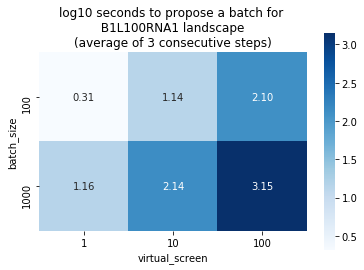

In [35]:
sns.heatmap(np.log10(sub_data.pivot("batch_size","virtual_screen","time1xround"))\
            , annot=True, fmt=".2f", square=True, cmap="Blues")
plt.title("log10 seconds to propose a batch for \n B1L100RNA1 landscape \n(average of 3 consecutive steps)")

In [36]:
efficiency_data=pd.read_csv("simulations/eval/EF/Greedy_mu0.02_tr0.05_r0.1_rho1.csv")

In [37]:
efficiency_data.head()

,batch,sequence,true_score,model_score,batch_size,measurement_cost,virtual_evals,landscape_id,start_id,model_type,mo_ratio,horizon,explorer_type
0,1,GAACGAGGCACAUUCCGGCUCGCCUGGCCUAUGUGAGCAUGGGCCG...,0.649750,0.649750,1000,1001,1091,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,1,10,Greedy_mu0.02_tr0.05_r0.1_rho1
1,1,GAACGAGGCACAUUCCGGCUCGCCCGGCCCAUGUGAGCAUGGGCCG...,0.649750,0.649750,1000,1001,1091,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,1,10,Greedy_mu0.02_tr0.05_r0.1_rho1
2,1,GAACGAGGCACAUUCCGGCUCGCCCGGCCCAUGUGAGCAUGGGCCG...,0.649750,0.649750,1000,1001,1091,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,1,10,Greedy_mu0.02_tr0.05_r0.1_rho1
3,1,GAACGAGGCACAUUCCGGCUCGCCCGGCCCAUGUGAGCAUGGGCCG...,0.638601,0.638601,1000,1001,1091,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,1,10,Greedy_mu0.02_tr0.05_r0.1_rho1
4,1,GAACGAGGCACAUUCCGGCUCGCCCGGCCCAUGUGAGCAUGGGCCG...,0.632449,0.632449,1000,1001,1091,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,1,10,Greedy_mu0.02_tr0.05_r0.1_rho1


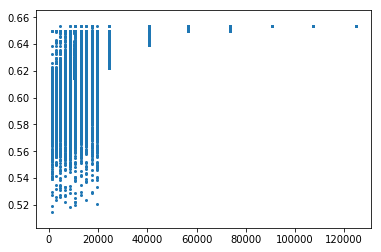

In [46]:
plt.scatter( efficiency_data.virtual_evals,efficiency_data.true_score,s=4)